# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | karwar
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | butembo
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | puerto deseado
Processing Record 14 of Set 1 | koneurgench
City not found. Skipping...
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | maxixe
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | vytegra
Processing Record 19 of Set 1 | firmat
Processing Record 20 of Set 1 | pocone
Processing Record 21 of Set 1 | cadale
Processing Record 22 of Set 1 | bredasdo

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,293.94,53,75,3.60,CA,1722886558
1,margate,51.3813,1.3862,292.42,74,1,4.62,GB,1722886559
2,ushuaia,-54.8000,-68.3000,272.96,64,20,0.00,AR,1722886432
3,karwar,14.8000,74.1333,299.13,86,64,2.81,IN,1722886562
4,bethel,41.3712,-73.4140,305.40,57,0,3.60,US,1722886563


In [29]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [31]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,293.94,53,75,3.60,CA,1722886558
1,margate,51.3813,1.3862,292.42,74,1,4.62,GB,1722886559
2,ushuaia,-54.8000,-68.3000,272.96,64,20,0.00,AR,1722886432
3,karwar,14.8000,74.1333,299.13,86,64,2.81,IN,1722886562
4,bethel,41.3712,-73.4140,305.40,57,0,3.60,US,1722886563


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

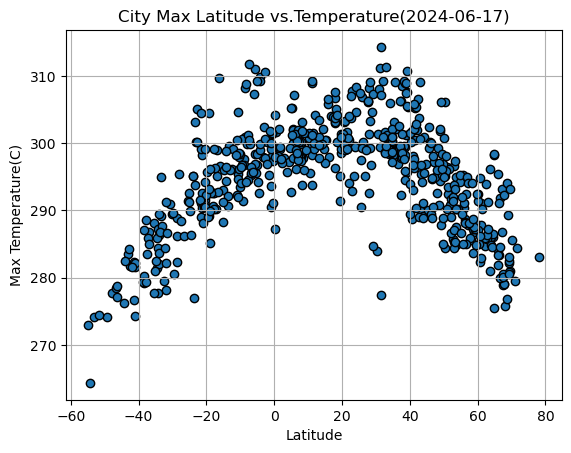

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs.Temperature(2024-06-17)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

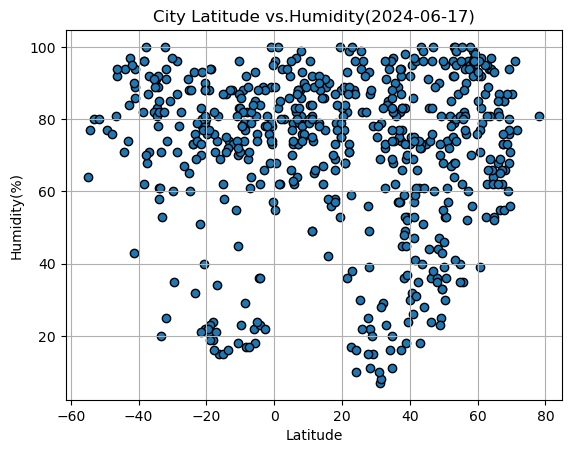

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2024-06-17)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

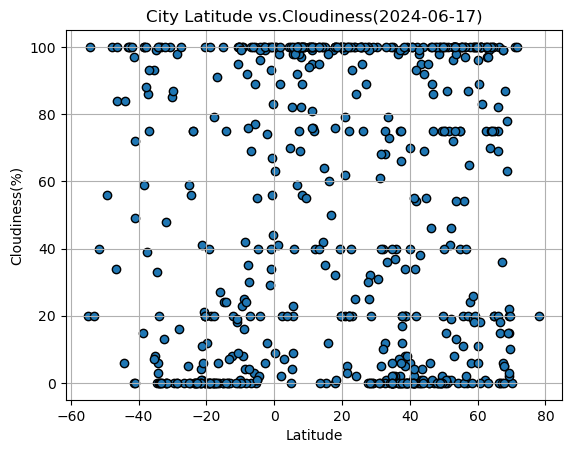

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2024-06-17)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

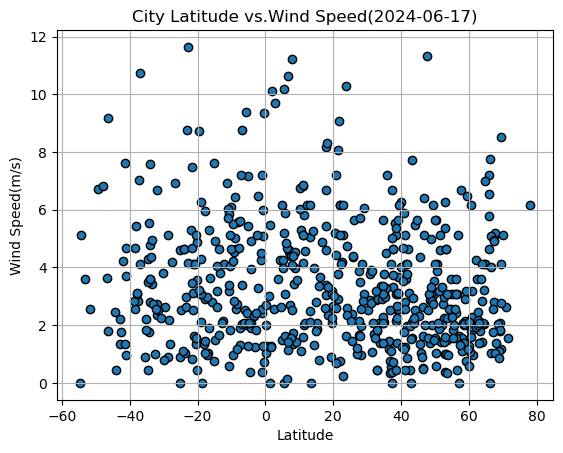

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2024-06-17)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):  
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq = f"y = {p_slope:.2f}x + {p_int:.2f}"
    residuals = y_axis - (p_slope * x_axis + p_int)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_axis - np.mean(y_axis))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r^2-value is: {r_squared}")
    

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,293.94,53,75,3.60,CA,1722886558
1,margate,51.3813,1.3862,292.42,74,1,4.62,GB,1722886559
3,karwar,14.8000,74.1333,299.13,86,64,2.81,IN,1722886562
4,bethel,41.3712,-73.4140,305.40,57,0,3.60,US,1722886563
7,qaqortoq,60.7167,-46.0333,282.30,71,100,1.81,GL,1722886566


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,272.96,64,20,0.00,AR,1722886432
5,port-aux-francais,-49.3500,70.2167,274.21,77,56,6.72,TF,1722886564
6,adamstown,-25.0660,-130.1015,292.58,65,59,4.59,PN,1722886565
9,blackmans bay,-43.0167,147.3167,283.56,74,100,1.34,AU,1722886568
12,puerto deseado,-47.7503,-65.8938,277.66,76,100,6.83,AR,1722886548


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.4044563934396771


Text(0, 0.5, 'Max Temp')

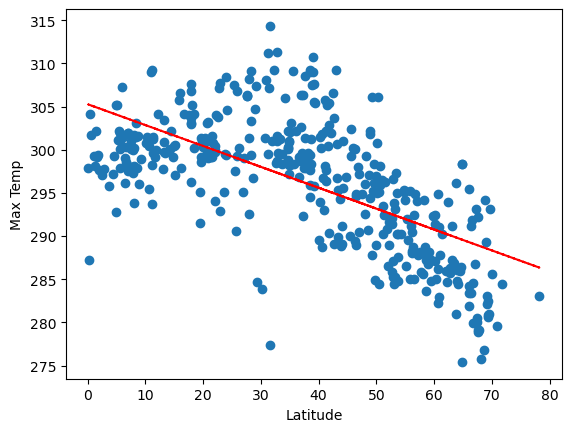

In [54]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


The r^2-value is: 0.6696108887584065


Text(0.5, 1.0, 'Latitude vs Max Temp')

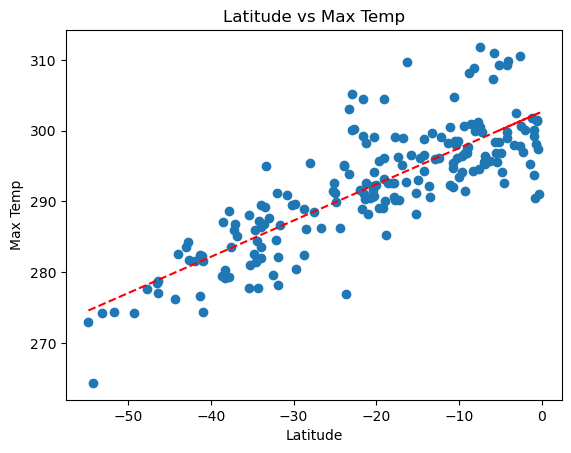

In [55]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')

**Discussion about the linear relationship:** 
In both hemispheres, temperatures are highest at the equator (0° latitude) and decrease as you move away. The Northern Hemisphere shows a decrease in temperature with increasing latitude, while the Southern Hemisphere shows an increase as latitude approaches 0°.


### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0006563173460655269


Text(0.5, 1.0, 'Latitude vs Max Temp')

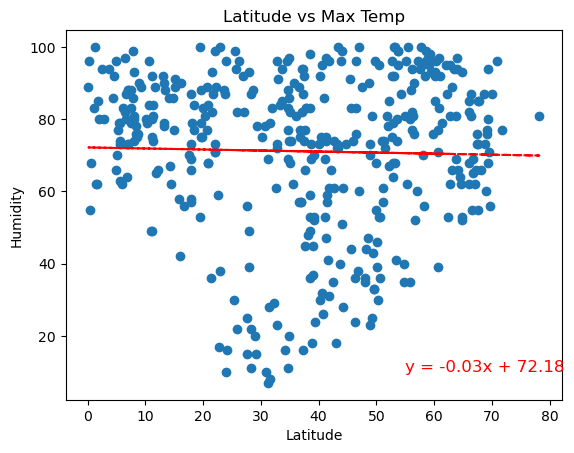

In [58]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Max Temp')

The r^2-value is: 0.04244123525274479


Text(0.5, 1.0, 'Latitude vs Max Temp')

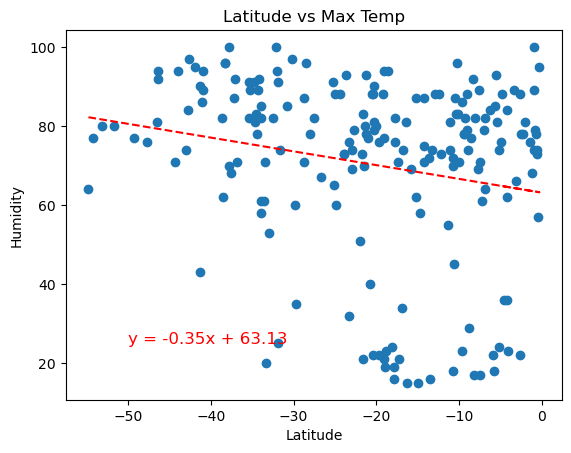

In [59]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Max Temp')


**Discussion about the linear relationship:** 
no correlation between humidity levels and latitude in the Northern Hemisphere and most of the Southern Hemisphere. However, it does indicate high humidity levels near the equator for both hempispheres

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.03031183044261776


Text(0.5, 1.0, 'Latitude vs Cloudiness')

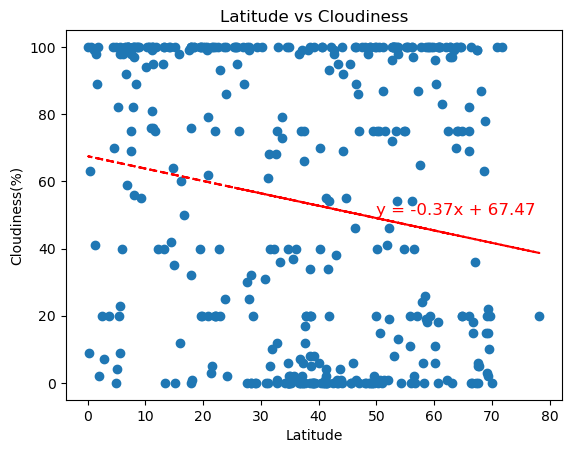

In [60]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs Cloudiness')

The r^2-value is: 0.001503426744446812


Text(0.5, 1.0, 'Latitude vs Cloudiness')

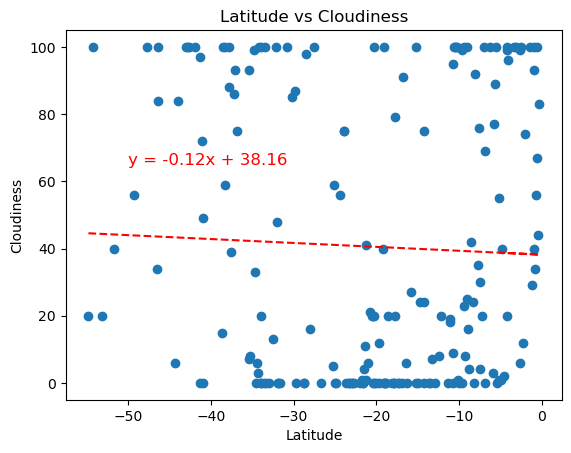

In [61]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

**Discussion about the linear relationship:** No corelation for southern hempisphere but some corelation for nother hempisphere(increases when closer to equator)

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.021959953391024856


Text(0.5, 1.0, 'Latitude vs Windspeed')

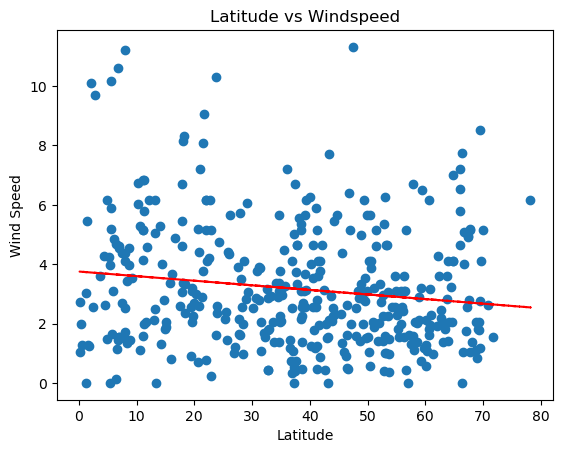

In [62]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Windspeed')

The r^2-value is: 0.000644439046013523


Text(0.5, 1.0, 'Latitude vs Windspeed')

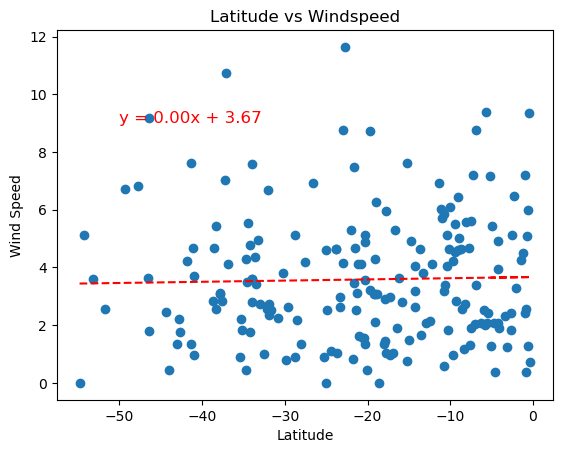

In [63]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Windspeed')

**Discussion about the linear relationship:** little to no correlation between wind speed and latitude on both hemispheres.